In [1]:
# read data into a DataFrame and importing all regression related libraries.
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split

import sys
!{sys.executable} -m pip install pytrends

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

C:\Users\tuleg\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\tuleg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#cleaned data
df=pd.read_csv("/Users/tuleg/Documents/python-introduction-MohiAhmed/data2.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#defining variables from dataset
NAS=df['NASDAQ']
KOS=df['KOSDAQ']
BTC=df['BTC']
IMP=df['Adj Impressions']
Date=df['Date']

Normalized Coefficients: 
 [ 0.83910491 -0.23417065  0.66463151]
Normalized Residual sum of squares: 0.02
Normalized Variance score: 0.69
Normalized Coefficients: 
 [ 0.83910491 -0.23417065  0.66463151]
Normalized Mean squared error: 0.02
Normalized R^2: 0.69


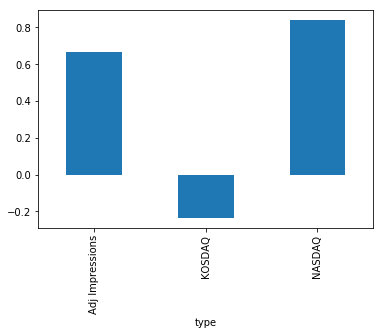

In [5]:
df3=df.drop(['Date'], axis=1)
df3.head()
df3_norm = (df3 - df3.mean()) / (df3.max() - df3.min()) #standardizing vars
#Redoing with standardization
ynorm=df3_norm['BTC']
Xnorm=df3_norm[['NASDAQ','KOSDAQ','Adj Impressions']]

#Splitting into test and train again,
sizen = float(len(Xnorm))
Xnorm_train = Xnorm[0:int(sizen*0.8)]
Xnorm_test = Xnorm[int(sizen*0.2):]
ynorm_train = ynorm[0:int(sizen*0.8)]
ynorm_test = ynorm[int(sizen*0.2):]

#Regression
regrnorm = LinearRegression()
regrnorm.fit(Xnorm_train, ynorm_train)
ynorm_pred = regrnorm.predict(Xnorm_test)

# The coefficients
print('Normalized Coefficients: \n', regrnorm.coef_)
# The mean square error
print("Normalized Residual sum of squares: %.2f"
      % np.mean((regrnorm.predict(Xnorm_test) - ynorm_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Normalized Variance score: %.2f' % regrnorm.score(Xnorm_test, ynorm_test))

#coefficients, MSE, and R^2 again 
print('Normalized Coefficients: \n', regrnorm.coef_)
print("Normalized Mean squared error: %.2f"
      % mean_squared_error(ynorm_test, ynorm_pred))
#R^2
print('Normalized R^2: %.2f' % r2_score(ynorm_test, ynorm_pred))

regrnorm.coef_
df4_norm = pd.DataFrame({'type':['NASDAQ','KOSDAQ','Adj Impressions'], 'coef':regrnorm.coef_})
df4_norm.groupby('type')['coef'].mean().plot(kind='bar')
#This now shows NASDAQ as the most important coefficient which is more
#accurate because the coefficients were normalized to achieve this

In [6]:
#normalized features
NASnorm=df3_norm['NASDAQ']
KOSnorm=df3_norm['KOSDAQ']
BTCnorm=df3_norm['BTC']
IMPnorm=df3_norm['Adj Impressions']

Text(0,0.5,'BTC')

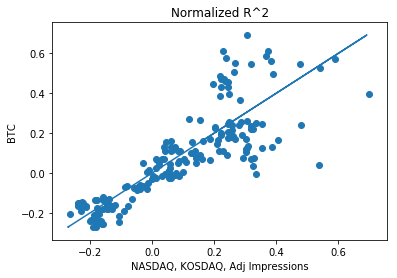

In [7]:
plt.title('Normalized R^2')
plt.scatter(regrnorm.predict(Xnorm_test),ynorm_test)
plt.plot(ynorm_test,ynorm_test)
plt.xlabel('NASDAQ, KOSDAQ, Adj Impressions')
plt.ylabel('BTC')

In [8]:
#Using k fold cross val
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(Xnorm_train, ynorm_train)
initpredictions = lm.predict(Xnorm_test)

Score: 0.694821344173


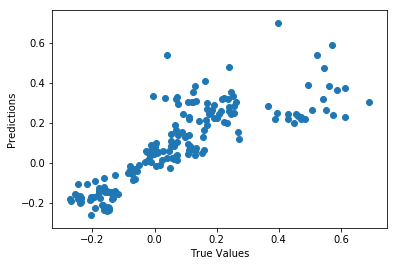

In [9]:
plt.scatter(ynorm_test, initpredictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print ('Score:', model.score(Xnorm_test, ynorm_test))

In [10]:
from sklearn.model_selection import KFold # import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 5-fold cross validation
kfoldscores = cross_val_score(model, Xnorm, ynorm, cv=5)
print('Cross-validated scores:', kfoldscores)

Cross-validated scores: [-7.86204781 -0.94376622  0.84837732 -0.43481703 -1.54267713]


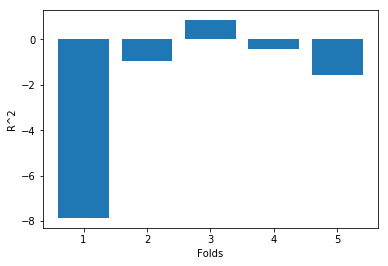

In [11]:
plt.xlabel('Folds')
plt.ylabel('R^2')

plt.bar(range(1,6),kfoldscores)
plt.show()

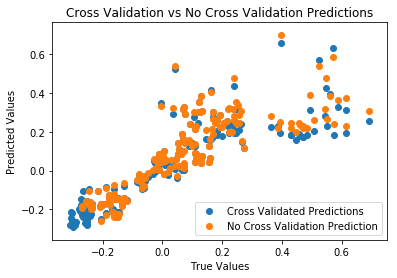

In [12]:
kfoldpredict=cross_val_predict(model,Xnorm,ynorm,cv=5)

cross=plt.scatter(ynorm,kfoldpredict)
plt.xlabel('True values')
plt.ylabel('Predicted Values')
#Looking at the two plot

nocross=plt.scatter(ynorm_test,initpredictions)
plt.title('Cross Validation vs No Cross Validation Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend((cross, nocross),
           ('Cross Validated Predictions', 'No Cross Validation Prediction'),loc='lower right')

In [13]:
#Random Forest
# Using Skicit-learn to split data into training and testing sets
#setting y to be the y variable in the dataframe
yrf=df3_norm['BTC']

#setting X to be all other features
Xrf=df3_norm.drop(['BTC'], axis=1)
#size of X and y
size=235

#splitting features
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split( Xrf, yrf, test_size=0.2, random_state=42)
#
df3_norm.head()

,NASDAQ,KOSDAQ,Adj Impressions,BTC
0,-0.391571,-0.353936,-0.138001,-0.308472
1,-0.374831,-0.356312,-0.124534,-0.301689
2,-0.383138,-0.339897,-0.119147,-0.298768
3,-0.379840,-0.352784,-0.100293,-0.306296
4,-0.361769,-0.347277,-0.073359,-0.305118


In [14]:
BTCmean=np.mean(BTC)
BTCnormmean=np.mean(BTCnorm)
print('Average Bitcoin Price:', BTCmean)
print('Average Normalized Bitcoin Price:',BTCnormmean)
#note these are two different averages because one is for the normalized data
# The baseline prediction is the average price

#baseline_errors = abs(BTCmean - yrf_test)
baseline_norm_errors=abs(BTCnormmean-yrf_test)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))
print('Average normalized baseline error: ', round(np.mean(baseline_norm_errors), 2))

Average Bitcoin Price: 6982.563829787233
Average Normalized Bitcoin Price: 7.653452339969164e-17
Average normalized baseline error:  0.2


In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(Xrf_train, yrf_train);

In [16]:
rf_predictions=rf.predict(Xrf_test)

#calculating the error
rf_error=abs(rf_predictions-yrf_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_error), 2))


Mean Absolute Error: 0.04


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rf_error / yrf_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.46 %.


In [18]:
from sklearn.metrics import r2_score
rf_predicted_train=rf.predict(Xrf_train)
rf_predicted_test=rf.predict(Xrf_test)

rf_test_score=r2_score(yrf_test, rf_predicted_test)

print('Test Data R^2 Score:', rf_test_score)

Test Data R^2 Score: 0.94490520876


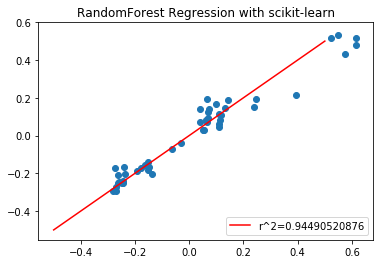

In [19]:
plt.scatter(yrf_test, rf_predicted_test)
#plt.plot(np.arange(8, 15), np.arange(8, 15), label="r^2=" + str(r2), c="r")
#plt.legend(loc="lower right")
#plt.title("RandomForest Regression with scikit-learn")
#plt.show
plt.plot(np.arange(-0.5, 1.5), np.arange(-0.5, 1.5), label='r^2=' + str(rf_test_score), c="r")
plt.legend(loc="lower right")
plt.title("RandomForest Regression with scikit-learn")
plt.show()

In [26]:
#So we have 2 models to use RF and linear
#Rf model is rf.predict
#linear model is lm.predict
df3_norm.head()

,NASDAQ,KOSDAQ,Adj Impressions,BTC
0,-0.391571,-0.353936,-0.138001,-0.308472
1,-0.374831,-0.356312,-0.124534,-0.301689
2,-0.383138,-0.339897,-0.119147,-0.298768
3,-0.379840,-0.352784,-0.100293,-0.306296
4,-0.361769,-0.347277,-0.073359,-0.305118


In [27]:
#saving models as pickes
#Saving rf model
import pickle
with open('RFregression.pkl', 'wb') as fid:
    pickle.dump(rf, fid,2) 
#creating feature vector and convert user input into dummy var    
#Create a Dataframe with only the dummy variables
user_rf = df3_norm.drop('BTC',axis=1)
index_dict = dict(zip(user_rf.columns,range(user_rf.shape[1])))

with open('user_rf', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  

In [28]:
import pickle
with open('LINregression.pkl', 'wb') as fid:
    pickle.dump(model, fid,2) 
#creating feature vector and convert user input into dummy var    
#Create a Dataframe with only the dummy variables
user_lin = df3_norm.drop('BTC',axis=1)
index_dict2 = dict(zip(user_lin.columns,range(user_lin.shape[1])))

with open('user_lin', 'wb') as fid:
    pickle.dump(index_dict2, fid,2)  